# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [25]:
!pip3 install seaborn

    100% |████████████████████████████████| 163kB 1.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/mahmoud/Library/Caches/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


## This cell automatically downloads Capital Bikeshare data

In [9]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')

Downloading: 2016 Q1 | Extracting... | Created: ../data/2016-Q1-cabi-trip-history-data.csv


### And here we read in the data

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

CPU times: user 914 ms, sys: 83 ms, total: 997 ms
Wall time: 999 ms
CPU times: user 2.02 s, sys: 4.39 ms, total: 2.02 s
Wall time: 2.02 s


### Create a new column that represents the hour of the day 

In [33]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

### Aggregate to get a count per hour/minute of the day across all trips

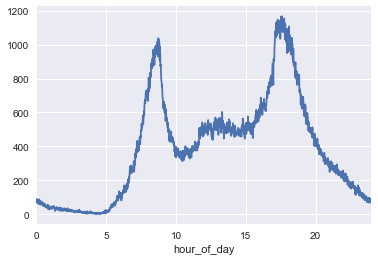

In [34]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
# import seaborn as sns

# sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression `\alpha` (alpha) Ridge Coefficient values
